# Homework 4 
## Due Thursday Mar. 13th

### Exercise 8.1: A low-pass filter

Exercise 8.1 in your book shows a simple circuit. This circuit acts as a low-pass filter: you send a signal in on the left and it comes out filtered on the right.

Using Ohm's law and the capacitor law and assuming that the output load has
very high impedance, so that a negligible amount of current flows through
it, we can write down the equations governing this circuit as follows.  Let
$I$ be the current that flows through $R$ and into the capacitor, and let
$Q$ be the charge on the capacitor.  Then:

$$
IR = V_\textrm{in} - V_\textrm{out}\,,\qquad
 Q = CV_\textrm{out}\,,\qquad
 I = {dQ\over dt}.
$$

Substituting the second equation into the third, then substituting the
result into the first equation, we find that $V_\textrm{in} -
V_\textrm{out} = RC\>({dV_\textrm{out}/dt})$, or equivalently

$$
{dV_\textrm{out}\over dt} = {1\over RC}
                               \bigl( V_\textrm{in} - V_\textrm{out} \bigr).
$$


- Write a program (or modify a previous one) to solve this equation for
  $V_\textrm{out}(t)$ using the fourth-order Runge-Kutta method when in
  the input signal is a square-wave with frequency $\sim 1$ and amplitude $\sim 1$:
$$
V_\textrm{in}(t) = \begin{cases}
                     1  & \qquad\mbox{if $\lfloor 2t \rfloor$ is even,} \\
                     -1 & \qquad\mbox{if $\lfloor 2t \rfloor$ is odd,}
                   \end{cases}
$$
where $\lfloor x\rfloor$ means $x$ rounded down to the next lowest integer.
Use the program to make plots of the output of the filter circuit from
$t=0$ to $t=10$ when $RC=0.01$, $0.1$, and $1$, (so that's three separate plots) with initial
condition $V_\textrm{out}(0)=0$.  You will have to make a decision about
what value of $h$ to use in your calculation.  Small values give more
accurate results, but the program will take longer to run.  Try a variety
of different values and choose one for your final calculations that seems
sensible to you. (15 points)

- Based on the graphs produced by your program, describe what you see
  and explain what the circuit is doing. (5 points)

Use the initial condition $V_\textrm{out}(0)= 0$ and the fourth-order Runge-Kutta method.

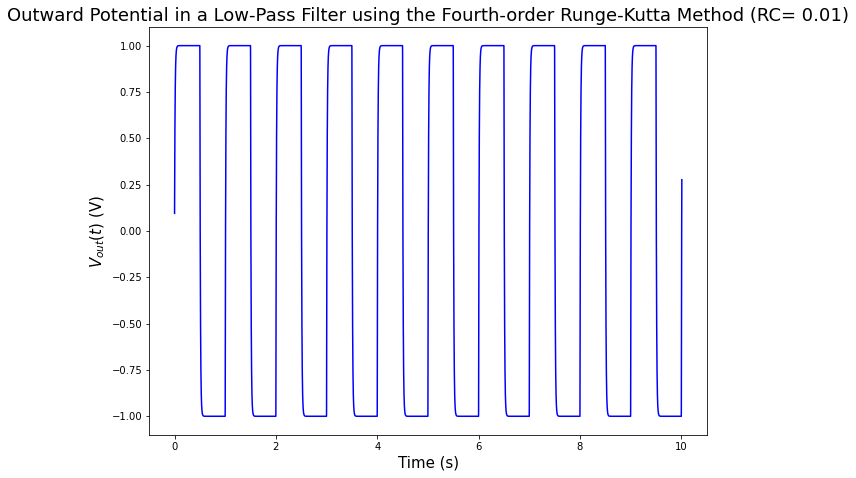

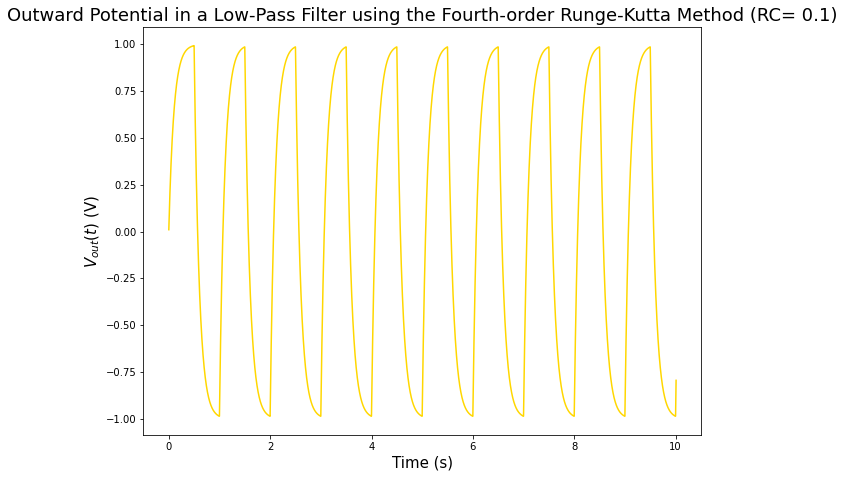

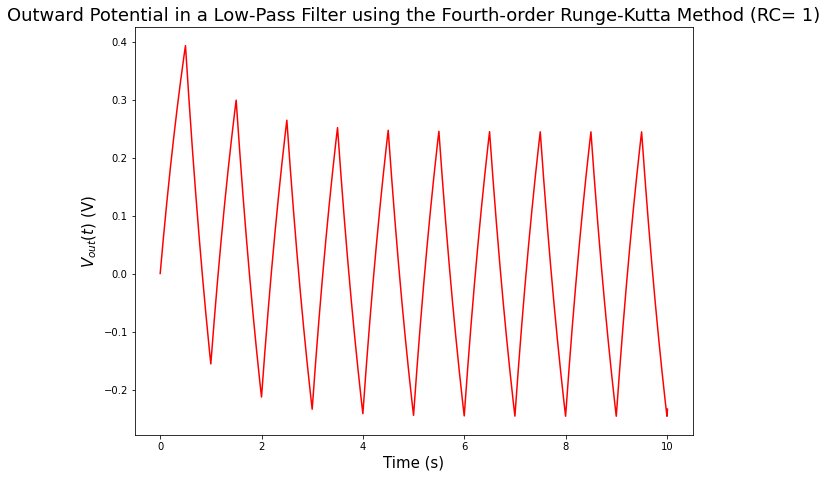

In [1]:
# code
import numpy as np
import math     # math.floor rounds down, in this case for the times
import matplotlib.pyplot as plt

RC = 0.01
V_out = 0     # To avoid error of V_out not being defined, define it here with its initial value

step_size = 0.001     # Seconds per step; may change based on quality of results

# Define the low-pass filter function for outward potential
def func_LPF(V_out, t): 
#     print(math.floor(2*t) % 2, math.floor(2*t), t)
    if math.floor(2*t) % 2 == 0:     # 2t is even
        V_in = 1
    else:     # 2t is odd
        V_in = -1
#     print(math.floor(2*t) % 2, math.floor(2*t), t, V_in)
    return (1/RC)*(V_in-V_out)

# Define function to be evaluated
def RK_4(x, t, step_size): 
    k_1 = step_size*func_LPF(x, t)
    k_2 = step_size*func_LPF(x+k_1/2, t+step_size/2)
    k_3 = step_size*func_LPF(x+k_2/2, t+step_size/2)
    k_4 = step_size*func_LPF(x+k_3, t+step_size)
    return ((1/6)*(k_1+2*k_2+2*k_3+k_4))     # Divide by step size to obtain correct scaling on y-axis (x(t)). Don't multiply by x

# Use predefined step size from t = 0 to t = 10
tpoints = np.arange(0, 10.01, step_size)
V_out_points = []     # Define V_out list here

# Calculate x at each t
for t in tpoints: 
    V_out += RK_4(V_out, t, step_size)
    V_out_points.append(V_out)
    
# Plot the graph of the points for each RC size, starting at 0.01
plt.figure(figsize=(10, 7.5))
plt.plot(tpoints, V_out_points, c = 'blue')
plt.title(f"Outward Potential in a Low-Pass Filter using the Fourth-order Runge-Kutta Method (RC= {RC})", size = 18)
plt.xlabel("Time (s)", size = 15)
plt.ylabel("$V_{out}(t)$ (V)", size = 15)
plt.show()

# Redefine RC as 0.1 and plot again
RC = 0.1
V_out = 0     # Redefine here to avoid plotting accuracy issues
# Use predefined step size from t = 0 to t = 10
tpoints = np.arange(0, 10.01, step_size)
V_out_points = []     # Define V_out list here

# Calculate V_out at each t
for t in tpoints: 
    V_out += RK_4(V_out, t, step_size)
    V_out_points.append(V_out)
    
plt.figure(figsize=(10, 7.5))
plt.plot(tpoints, V_out_points, c = 'gold')
plt.title(f"Outward Potential in a Low-Pass Filter using the Fourth-order Runge-Kutta Method (RC= {RC})", size = 18)
plt.xlabel("Time (s)", size = 15)
plt.ylabel("$V_{out}(t)$ (V)", size = 15)
plt.show()

# Plot finally with RC = 1
RC = 1
V_out = 0
# Use predefined step size from t = 0 to t = 10
tpoints = np.arange(0, 10.01, step_size)
V_out_points = []     # Define V_out list here

# Calculate x at each t
for t in tpoints: 
    V_out += RK_4(V_out, t, step_size)
    V_out_points.append(V_out)
    
plt.figure(figsize=(10, 7.5))
plt.plot(tpoints, V_out_points, c = 'red')
plt.title(f"Outward Potential in a Low-Pass Filter using the Fourth-order Runge-Kutta Method (RC= {RC})", size = 18)
plt.xlabel("Time (s)", size = 15)
plt.ylabel("$V_{out}(t)$ (V)", size = 15)
plt.show()

For RC= 0.01, the circuit acts as a square wave. Its outward flow of potential changes from 0 to 1 nearly instantaneously, stays at that potential for half a second, then decreases to -1. From there, it alternates between -1 and 1 every half second nearly instantaneously. Therefore the period is 1 second to get from one local maximum to the next or from one local minimum to the next.

The transition between $V_{out}(t)$ values of -1 and 1 has the same period for RC= 0.1, however it is slower and does not act as a square wave anymore.

For RC = 1, the amplitude is substantially lower and the transitions between the highest and lowest values of $V_{out}(t)$ occur even more slowly. However, the period remains the same at 1 second.

### Exercise 8.2: The Lotka--Volterra equations

The Lotka--Volterra equations are a
mathematical model of predator--prey interactions between biological
species.  Let two variables $x$ and $y$ be proportional to the size of the
populations of two species, traditionally called "rabbits" (the
prey) and "foxes" (the predators).  You could think of $x$ and $y$ as
being the population in thousands, say, so that $x=2$ means there are 2000
rabbits.  Strictly the only allowed values of $x$ and $y$ would then be
multiples of 0.001, since you can only have whole numbers of rabbits or
foxes.  But 0.001 is a pretty close spacing of values, so it's a decent
approximation to treat $x$ and $y$ as continuous real numbers so long as
neither gets very close to zero.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional
to their population, but are eaten by the foxes at a rate proportional to
both their own population and the population of foxes:

$$
{dx\over dt} = \alpha x - \beta xy,
$$

where $\alpha$ and $\beta$ are constants.  At the same time the foxes
reproduce at a rate proportional the rate at which they eat
rabbits-because they need food to grow and reproduce-but also die of
old age at a rate proportional to their own population:

$$
{dy\over dt} = \gamma xy - \delta y,
$$

where $\gamma$ and $\delta$ are also constants.


- Write a program to solve these equations using the fourth-order
  Runge--Kutta method for the case $\alpha=1$, $\beta=\gamma=0.5$, and
  $\delta=2$, starting from the initial condition $x=y=2$.  Have the
  program make a graph showing both $x$ and $y$ as a function of time on
  the same axes from $t=0$ to $t=30$.  (Hint: Notice that the differential
  equations in this case do not depend explicitly on time $t$; in vector
  notation, the right-hand side of each equation is a function $f(\vec{r})$
  with no $t$ dependence.  You may nonetheless find it convenient to define
  a Python function $\verb|f(r,t)|$ including the time variable, so that your
  program takes the same form as programs given earlier in this chapter.
  You don't have to do it that way, but it can avoid some confusion.) (15 points)
- Describe in words what is going on in the system, in terms of rabbits
  and foxes. (5 points)

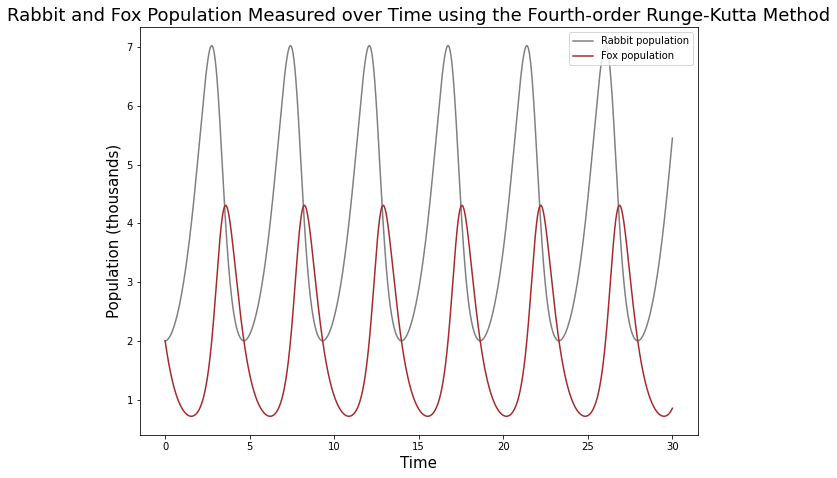

In [2]:
# code
# Define constants
alpha = 1
beta = 0.5
gamma = 0.5
delta = 2

# Define initial x, initial y, and step size
x = 2
y = 2
step_size = 0.001     # Units of time per step; may change based on quality of results

# Define rabbit (x) and fox (y) functions based on "r" to consolidate into one function
def func_r(r, t): 
    x= r[0]
    y= r[1]
    f_x = alpha*x-beta*x*y
    f_y = gamma*x*y-delta*y
    return np.array([f_x, f_y], float)     # Use 'float' so that array does not only use integers

# Define function to be evaluated
def RK_4(r, t, step_size): 
    k_1 = step_size*func_r(r, t)
    k_2 = step_size*func_r(r+k_1/2, t+step_size/2)
    k_3 = step_size*func_r(r+k_2/2, t+step_size/2)
    k_4 = step_size*func_r(r+k_3, t+step_size)
    return ((1/6)*(k_1+2*k_2+2*k_3+k_4))     # Divide by step size to obtain correct scaling on y-axis (x(t)). Don't multiply by x

# Use predefined step size from t = 0 to t = 30
tpoints = np.arange(0, 30.01, step_size)
xpoints = []     # Define x and y lists here
ypoints = []

r = np.array([x, y], float)

# Calculate x and y at each t
for t in tpoints: 
    r += RK_4(r, t, step_size)
    xpoints.append(r[0])     # Append first element of r as next x
    ypoints.append(r[1])     # Append second element of r as next y

# Generate the rabbit vs. fox plot
plt.figure(figsize=(10, 7.5))
plt.plot(tpoints, xpoints, c = 'gray', label='Rabbit population')
plt.plot(tpoints, ypoints, c = 'brown', label='Fox population')
plt.title(f"Rabbit and Fox Population Measured over Time using the Fourth-order Runge-Kutta Method", size = 18)
plt.xlabel("Time", size = 15)
plt.ylabel("Population (thousands)", size = 15)
plt.legend()
plt.show()

With the initial rabbit and fox populations both defined at 2000, the fox population decreases as there are not enough rabbits to feed all the foxes. This decline in the fox population allows the rabbit population to increase significantly, leading to more food for the foxes. The increase in the fox population means lots of rabbits are getting eaten, leaving the foxes with less food. Eventually, both populations are back to their starting values of 2000 and the cycle repeats itself.

Note that time units are not given, but obviously a system like this cannot change as quickly as being on the order of seconds. Therefore I left time as having arbitrary units.

### Exercise 8.3: The Lorenz equations

One of the most celebrated sets of differential equations in
physics is the Lorenz equations:

$$
{dx\over dt} = \sigma(y-x),\qquad
{dy\over dt} = rx - y - xz,\qquad
{dz\over dt} = xy - bz,
$$

where $\sigma$, $r$, and $b$ are constants.  (The names $\sigma$, $r$,
and $b$ are odd, but traditional; they are always used in these equations
for historical reasons.)

These equations were first studied by Edward Lorenz in 1963, who
derived them from a simplified model of weather patterns.  The
reason for their fame is that they were one of the first incontrovertible
examples of *deterministic chaos*, the occurrence of apparently
random motion even though there is no randomness built into the equations.
We encountered a different example of chaos in the logistic map of
Exercise 3.6.


- Write a program to solve the Lorenz equations for the case
  $\sigma=10$, $r=28$, and $b=\frac{8}{3}$ in the range from $t=0$ to $t=50$
  with initial conditions $(x,y,z)=(0,1,0)$.  Have your program make a plot
  of $y$ as a function of time.  Note the unpredictable nature of the
  motion.  (Hint: If you base your program on previous ones, be careful.
  This problem has parameters $r$ and $b$ with the same names as variables
  in previous programs---make sure to give your variables new names, or use
  different names for the parameters, to avoid introducing errors into your
  code.) (20 points)
- Modify your program to produce a plot of $z$ against~$x$.  You should
  see a picture of the famous "strange attractor'' of the Lorenz
  equations, a lop-sided butterfly-shaped plot that never repeats itself. (10 points)

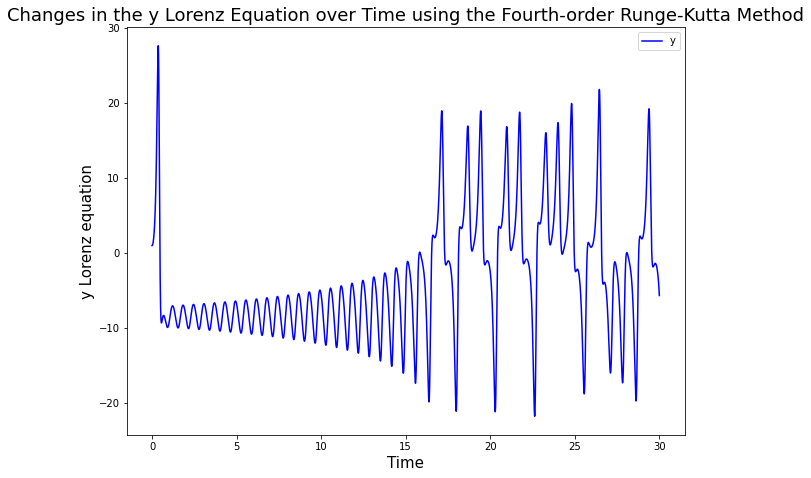

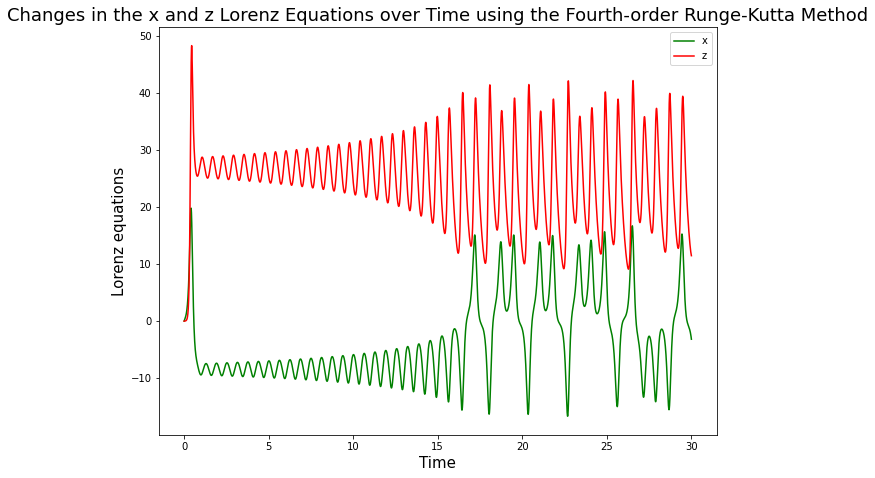

In [3]:
# code
# Define constants
sigma = 10
Lorenz_r = 28     # Define this "r" as Lorenz_r instead to avoid confusion with other r used for Runge-Kutta method
b = 8/3

# Define initial x, initial y, and step size
x = 0
y = 1
z = 0
step_size = 0.001     # Seconds per step; may change based on quality of results

# Define the three Lorenz equations based on "r" to consolidate into one function
def func_r(r, t): 
    x= r[0]
    y= r[1]
    z= r[2]
    f_x = sigma*(y-x)     # Similarly to last problem, f of each variable denotes d(var)/dt
    f_y = (Lorenz_r*x)-y-(x*z)
    f_z = (x*y)-(b*z)
    return np.array([f_x, f_y, f_z], float)     # Use 'float' so that array does not only use integers

# Define function to be evaluated
def RK_4(r, t, step_size): 
    k_1 = step_size*func_r(r, t)
    k_2 = step_size*func_r(r+k_1/2, t+step_size/2)
    k_3 = step_size*func_r(r+k_2/2, t+step_size/2)
    k_4 = step_size*func_r(r+k_3, t+step_size)
    return ((1/6)*(k_1+2*k_2+2*k_3+k_4))     # Divide by step size to obtain correct scaling on y-axis (x(t)). Don't multiply by x

# Use predefined step size from t = 0 to t = 50
tpoints = np.arange(0, 30.01, step_size)
xpoints = []     # Define x, y, and z lists here
ypoints = []
zpoints = []

r = np.array([x, y, z], float)     # Not to be confused with Lorenz_r

# Calculate x and y at each t
for t in tpoints: 
    r += RK_4(r, t, step_size)
    xpoints.append(r[0])     # Append first element of r as next x
    ypoints.append(r[1])     # Append second element of r as next y
    zpoints.append(r[2])     # Append third element of r as next z


plt.figure(figsize=(10, 7.5))
# plt.plot(tpoints, xpoints, c = 'green', label='x')
plt.plot(tpoints, ypoints, c = 'blue', label='y')
# plt.plot(tpoints, zpoints, c = 'red', label='z')
plt.title(f"Changes in the y Lorenz Equation over Time using the Fourth-order Runge-Kutta Method", size = 18)
plt.xlabel("Time", size = 15)
plt.ylabel("y Lorenz equation", size = 15)
plt.legend()
plt.show()

plt.figure(figsize=(10, 7.5))
plt.plot(tpoints, xpoints, c = 'green', label='x')
# plt.plot(tpoints, ypoints, c = 'blue', label='y')
plt.plot(tpoints, zpoints, c = 'red', label='z')
plt.title(f"Changes in the x and z Lorenz Equations over Time using the Fourth-order Runge-Kutta Method", size = 18)
plt.xlabel("Time", size = 15)
plt.ylabel("Lorenz equations", size = 15)
plt.legend()
plt.show()

### Exercise 8.5: The driven pendulum

A pendulum like the one in Exercise 8.4 can be driven by, for
example, exerting a small oscillating force horizontally on the mass.  Then
the equation of motion for the pendulum becomes

$$
{d^2\theta\over dt^2} = - {g\over\ell}\sin\theta
  + C \cos\theta \sin\Omega t,
$$

where $C$ and $\Omega$ are constants.

- Write a program to solve this equation for $\theta$ as a function of
  time with $\ell=10\,$cm, $C=2\,\mathrm{s}^{-2}$ and
  $\Omega=5\,\mathrm{s}^{-1}$ and make a plot of $\theta$ as a function of
  time from $t=0$ to $t=100\,$s.  Start the pendulum at rest with
  $\theta=0$ and $d\theta/d t=0$. (20 points)
- Now change the value of $\Omega$, while keeping $C$ the same, to find
  a value for which the pendulum resonates with the driving force and
  swings widely from side to side.  Make a plot for this case also. (10 points)

Result: 2*sin(5*t)*sin(theta) + 98.1*cos(theta)


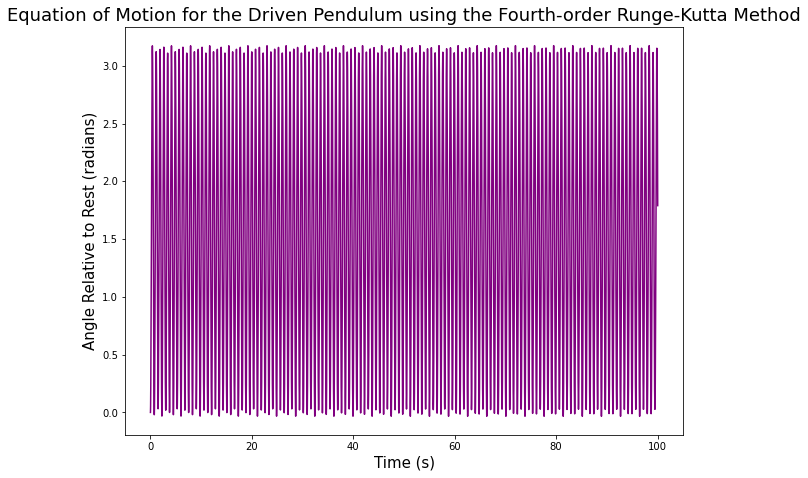

In [4]:
# code
# Part a
# Note: This problem is similar to the in-class pendulum problem at the end of diff_eq_2.ipynb.
from sympy import symbols, integrate, sin, cos, lambdify

C = 2     # s^(-2)
Omega = 5     # s^(-1)
theta = 0     # Initial value- avoids error of theta not being defined later on in the code
dtheta_dt = 0     # Define this and append to it later in "for t in tpoints" loop
g = 9.81     # m/s^2
l = 0.1     # m

step_size = 0.001     # Seconds per step; may change based on quality of results

# Define d^2(theta)/dt^2 function
def func_2deriv_theta(theta, t): 
    f_2_theta = -(g/l)*np.sin(theta)+C*np.cos(theta)*np.sin(Omega*t)
    return f_2_theta

# Integrate function above to obtain d(theta)/dt
# Define variables for integration, as integrating the func_2deriv_theta function yields a SympifyError
from sympy import symbols, integrate, sin, cos
theta_integ, t_integ = symbols('theta t')

# Define the function symbolically to avoid error
f_2_theta_integ = -(g/l)*sin(theta_integ) + C*cos(theta_integ)*sin(Omega*t_integ)

# Perform symbolic integration with respect to theta to obtain first derivative
func_deriv_theta_symbolic = integrate(f_2_theta_integ, theta_integ)  
print("Result:", func_deriv_theta_symbolic)     # Integrate func_2deriv_theta with respect to theta

func_deriv_theta = lambdify((theta_integ, t_integ), func_deriv_theta_symbolic, 'numpy')     # Use lambdify to convert back to a function for RK method

# Define function to be evaluated
def RK_4(x, t, step_size): 
    k_1 = step_size*func_deriv_theta(x, t)
    k_2 = step_size*func_deriv_theta(x+k_1/2, t+step_size/2)
    k_3 = step_size*func_deriv_theta(x+k_2/2, t+step_size/2)
    k_4 = step_size*func_deriv_theta(x+k_3, t+step_size)
    return ((1/6)*(k_1+2*k_2+2*k_3+k_4))     # Divide by step size to obtain correct scaling on y-axis (x(t)). Don't multiply by x

# Use predefined step size from t = 0 to t = 100
tpoints = np.arange(0, 100.01, step_size)
theta_points = []     # Define theta list here

# Calculate theta at each t
for t in tpoints: 
    dtheta_dt += RK_4(theta, t, step_size)     # RK_4 gives acceleration, so it updates velocity
    theta += dtheta_dt * step_size     # Update angular position using change in theta per unit time
    theta_points.append(theta)
    
# Plot the graph of the points for each RC size
plt.figure(figsize=(10, 7.5))
plt.plot(tpoints, theta_points, c = 'purple')
plt.title(f"Equation of Motion for the Driven Pendulum using the Fourth-order Runge-Kutta Method", size = 18)
plt.xlabel("Time (s)", size = 15)
plt.ylabel("Angle Relative to Rest (radians)", size = 15)
plt.show()

The graph above shows that with the given values of C and Ω, the pendulum bob swings from its resting position to a near-vertical position (3 radians is nearly 180 degrees) for each oscillation with a period of nearly 1.5 seconds. Decreasing the step size from 0.01 to 0.001 led to this result. With a step size of 0.01, the amplitude was the same, however the period was over 2 seconds instead of closer to 1.5 seconds.

For part b, we want the driving frequency Omega to match the oscillation period.

Result: 2*sin(0.67*t)*sin(theta) + 98.1*cos(theta)


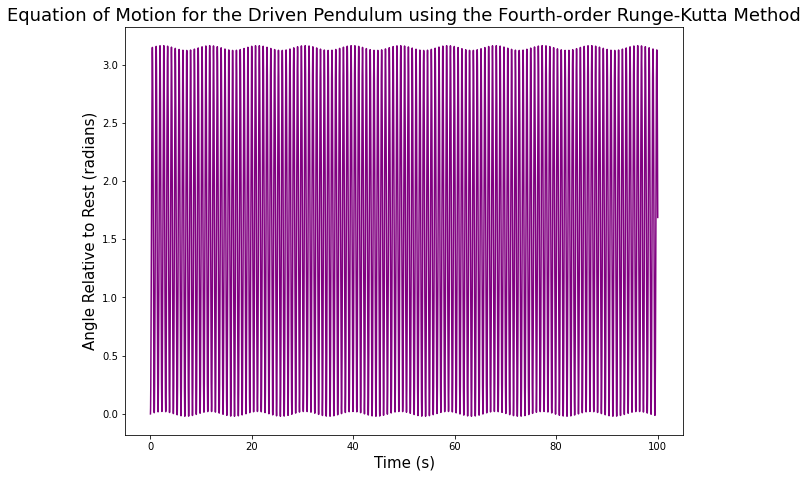

In [5]:
# Part b
# Change code for Omega value
C = 2     # s^(-2)
Omega = 0.67     # s^(-1)
theta = 0     # Initial value- avoids error of theta not being defined later on in the code
dtheta_dt = 0     # Define this and append to it later in "for t in tpoints" loop
g = 9.81     # m/s^2
l = 0.1     # m

step_size = 0.001     # Seconds per step; may change based on quality of results

# Define d^2(theta)/dt^2 function
def func_2deriv_theta(theta, t): 
    f_2_theta = -(g/l)*np.sin(theta)+C*np.cos(theta)*np.sin(Omega*t)
    return f_2_theta

# Integrate function above to obtain d(theta)/dt
# Define variables for integration, as integrating the func_2deriv_theta function yields a SympifyError
from sympy import symbols, integrate, sin, cos
theta_integ, t_integ = symbols('theta t')

# Define the function symbolically to avoid error
f_2_theta_integ = -(g/l)*sin(theta_integ) + C*cos(theta_integ)*sin(Omega*t_integ)

# Perform symbolic integration with respect to theta to obtain first derivative
func_deriv_theta_symbolic = integrate(f_2_theta_integ, theta_integ)  
print("Result:", func_deriv_theta_symbolic)     # Integrate func_2deriv_theta with respect to theta

func_deriv_theta = lambdify((theta_integ, t_integ), func_deriv_theta_symbolic, 'numpy')     # Use lambdify to convert back to a function for RK method

# Define function to be evaluated
def RK_4(x, t, step_size): 
    k_1 = step_size*func_deriv_theta(x, t)
    k_2 = step_size*func_deriv_theta(x+k_1/2, t+step_size/2)
    k_3 = step_size*func_deriv_theta(x+k_2/2, t+step_size/2)
    k_4 = step_size*func_deriv_theta(x+k_3, t+step_size)
    return ((1/6)*(k_1+2*k_2+2*k_3+k_4))     # Divide by step size to obtain correct scaling on y-axis (x(t)). Don't multiply by x

# Use predefined step size from t = 0 to t = 100
tpoints = np.arange(0, 100.01, step_size)
theta_points = []     # Define theta list here

# Calculate theta at each t
for t in tpoints: 
    dtheta_dt += RK_4(theta, t, step_size)     # RK_4 gives acceleration, so it updates velocity
    theta += dtheta_dt * step_size     # Update angular position using change in theta per unit time
    theta_points.append(theta)
    
# Plot the graph of the points for each RC size
plt.figure(figsize=(10, 7.5))
plt.plot(tpoints, theta_points, c = 'purple')
plt.title(f"Equation of Motion for the Driven Pendulum using the Fourth-order Runge-Kutta Method", size = 18)
plt.xlabel("Time (s)", size = 15)
plt.ylabel("Angle Relative to Rest (radians)", size = 15)
plt.show()

As I can see from this plot, the amplitude for the modified Omega value of 0.67 is approximately the same as for Omega = 5. However, the period is ever so slightly shorter with this reduced Omega value. Additionally, the crests and troughs on the graph appear to form wave-like shapes over time. The period is about 1.5 seconds, or 0.67 periods per second (which matches the new Omega value).